In [1]:
import numpy as np
import pandas as pd
from pandas import json_normalize
import seaborn as sns
import matplotlib.pyplot as plt

import ast

import warnings
warnings.filterwarnings("ignore")

from my_functions import *

In [2]:
df_uk_rock = pd.read_csv('Datasets/df_uk_rock.csv')
df_uk_rock.shape

(12060, 13)

In [3]:
df_uk_rock.head()

,artist_id,master_id,main_release_id,release_country,artist,title,year,album_length,tracks,release_type,genres,styles,artist_profile
0,253712,158153,426893,US,Sparta,Wiretap Scars,2002,47.62,12,['Album'],['Rock'],"['Indie Rock', 'Alternative Rock']","El Paso, Texas based band. Formed in 2001 afte..."
1,1003,11052,7781939,Europe,Muse,Absolution,2003,52.18,14,"['Album', 'Stereo']",['Rock'],['Alternative Rock'],"Muse are an English rock band from Teignmouth,..."
2,1003,11001,446060,UK,Muse,Showbiz,1999,49.65,12,"['Album', 'Stereo']",['Rock'],"['Alternative Rock', 'Prog Rock']","Muse are an English rock band from Teignmouth,..."
3,279192,117961,505983,US,Finch,What It Is to Burn,2002,61.18,13,['Album'],['Rock'],"['Emo', 'Post-Hardcore', 'Alternative Rock']","Finch is a post-hardcore band from Temecula, C..."
4,289490,130980,411599,US,Transplants,Transplants,2002,45.23,12,"['Album', 'Stereo']","['Hip Hop', 'Rock', 'Pop']",['Punk'],"Punk rock/rap rock band Los Angeles, CA, Unite..."


In [4]:
df_uk_rock[df_uk_rock['title']=='Black Sabbath']

,artist_id,master_id,main_release_id,release_country,artist,title,year,album_length,tracks,release_type,genres,styles,artist_profile
254,144998,723,462466,UK,Black Sabbath,Black Sabbath,1970,38.28,7,"['LP', 'Album', 'Stereo']",['Rock'],"['Blues Rock', 'Heavy Metal', 'Hard Rock', 'Do...",Considered by many to be the first heavy metal...


In [5]:
df_masters_scrapped = pd.read_csv('Datasets/df_masters.csv')
df_masters_scrapped.shape

(56660, 13)

# **``styles`` type**

In [54]:
# import the dataframe
df = pd.read_csv('Datasets/df_us_masters.csv')
df.shape

(28082, 13)

In [55]:
df.head(1)

,artist_id,master_id,main_release_id,release_country,artist,title,year,album_length,tracks,release_type,genres,styles,artist_profile
0,894435.0,890791,3796872,US,Dicky Doo & The Don'ts,Teen Scene,1960,26.7,12,"['LP', 'Album']",['Rock'],['Rock & Roll'],Initially created as a mythical act as a vehic...


## Changing the type

In [56]:
df.styles[0]

"['Rock & Roll']"

In [57]:
df.styles.value_counts().head()

styles
[]                      3435
['Pop Rock']             838
['Hard Rock']            777
['Alternative Rock']     748
['Punk']                 537
Name: count, dtype: int64

In [58]:
df.styles.nunique()

7158

It looks like they are lists, but actually...

In [59]:
type(df.styles[0])

str

In [60]:
# convert these strings to 
df.styles=df.styles.apply(ast.literal_eval)
type(df.styles[0])

list

## ``explode`` in one line of code

In [3]:
# import the dataframe
df_us_masters_scraped = pd.read_csv('Datasets/df_us_masters.csv')
df_us_masters_scraped['styles']=df_us_masters_scraped["styles"].apply(ast.literal_eval)
df_styles = df_us_masters_scraped.explode('styles')
top_80_styles = df_styles['styles'].value_counts().head(80).index.to_list()

for style in top_80_styles:
    print(style)

Pop Rock
Folk Rock
Alternative Rock
Hard Rock
Psychedelic Rock
Punk
Country Rock
Rock & Roll
Indie Rock
Blues Rock
Soft Rock
Heavy Metal
AOR
Garage Rock
New Wave
Prog Rock
Experimental
Folk
Hardcore
Country
Classic Rock
Power Pop
Gospel
Thrash
Soul
Vocal
Acoustic
Ballad
Southern Rock
Synth-pop
Avantgarde
Funk
Art Rock
Jazz-Rock
Rhythm & Blues
Religious
Lounge
Surf
Lo-Fi
Rockabilly
Fusion
Glam
Post-Punk
Disco
Goth Rock
Noise
Industrial
Grunge
Arena Rock
Easy Listening
Soundtrack
Beat
Speed Metal
Doo Wop
Ambient
Ska
Death Metal
Jazz-Funk
Parody
Funk Metal
New Age
Psychedelic
Space Rock
Acid Rock
Ethereal
Bluegrass
Free Improvisation
Symphonic Rock
Comedy
Spoken Word
Instrumental
Novelty
Power Metal
Abstract
Electric Blues
Country Blues
Progressive Metal
Contemporary Jazz
Texas Blues
Soul-Jazz


## ``explode`` in several lines of code

In [62]:
df['styles'].value_counts().head()

styles
[]                    3435
[Pop Rock]             838
[Hard Rock]            777
[Alternative Rock]     748
[Punk]                 537
Name: count, dtype: int64

In [63]:
df.shape

(28082, 13)

In [64]:
df_styles = df.explode('styles')
df_styles.shape

(52684, 13)

In [65]:
df_styles['styles'].nunique()   # before we had 3851

373

In [67]:
df_styles['styles'].value_counts().head(80)

styles
Pop Rock             3294
Folk Rock            2343
Alternative Rock     2299
Hard Rock            2265
Psychedelic Rock     2104
                     ... 
Country Blues          74
Progressive Metal      73
Contemporary Jazz      73
Texas Blues            70
Soul-Jazz              67
Name: count, Length: 80, dtype: int64

In [68]:
top_80_styles = df_styles['styles'].value_counts().head(80).index.to_list()

Text(0, 0.5, 'Count')

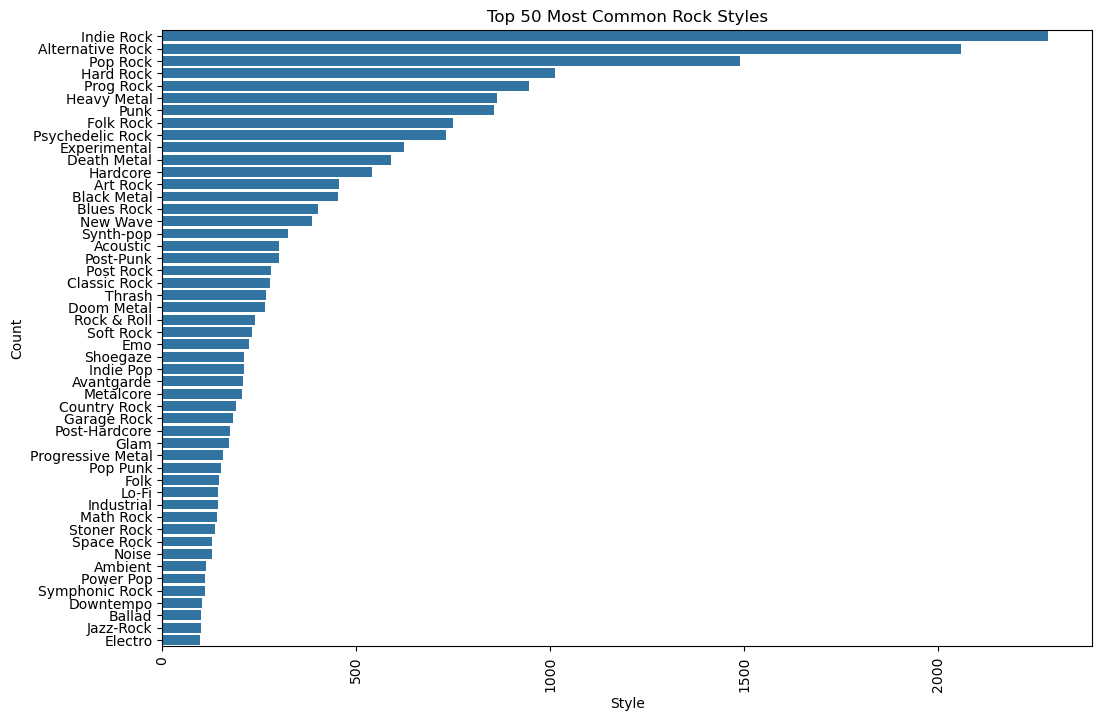

In [42]:
top_styles = df_styles['styles'].value_counts().head(50)

# Create a countplot of the most common 50 styles
plt.figure(figsize=(12, 8))
sns.countplot(data=df_styles[df_styles['styles'].isin(top_styles.index)], y='styles', order=top_styles.index)

# Rotate x-axis labels for readability
plt.xticks(rotation=90)
plt.title('Top 50 Most Common Rock Styles')
plt.xlabel('Style')
plt.ylabel('Count')

In [32]:
df['styles'].value_counts()

styles
[Indie Rock]                                                                  651
[Alternative Rock]                                                            487
[Death Metal]                                                                 323
[Pop Rock]                                                                    308
[]                                                                            282
                                                                             ... 
[Disco, Europop, Pop Rock, Vocal, Soundtrack, Soft Rock, Ballad, Schlager]      1
[Pop Rock, Disco, Europop]                                                      1
[Vocal, Acoustic, Folk Rock]                                                    1
[Downtempo, Abstract, Psychedelic Rock, Prog Rock, Ambient]                     1
[Progressive Metal, Post-Metal, Black Metal, Death Metal]                       1
Name: count, Length: 3851, dtype: int64

# **``album_length``**

In [47]:
df.album_length.value_counts()

album_length
0.00     3007
41.72      16
42.17      16
42.80      15
39.80      15
         ... 
27.63       1
71.53       1
70.58       1
75.12       1
75.17       1
Name: count, Length: 2674, dtype: int64